<a href="https://colab.research.google.com/github/Alchem1st18/Machine_Learning_models/blob/main/ml_telescope_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [2]:
cols = ["flen","fwid","fsize","fconc","fconc1","fasym","fm3long","fm3trans","falpha","fdist","class"]
df = pd.read_csv("magic04.data",names = cols)
df.head()

flen      fwid   fsize   fconc  fconc1     fasym  fm3long  fm3trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    falpha     fdist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [3]:
df["class"] = (df["class"] == "g").astype(int)


In [ ]:
df.head()

flen      fwid   fsize   fconc  fconc1     fasym  fm3long  fm3trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    falpha     fdist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

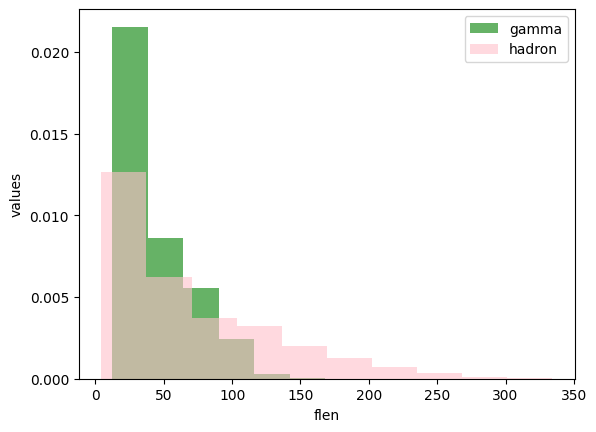

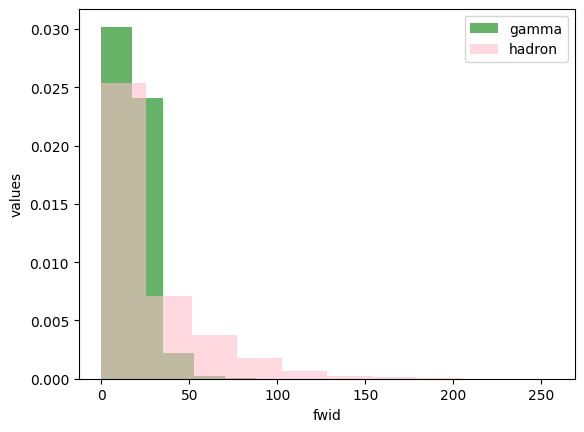

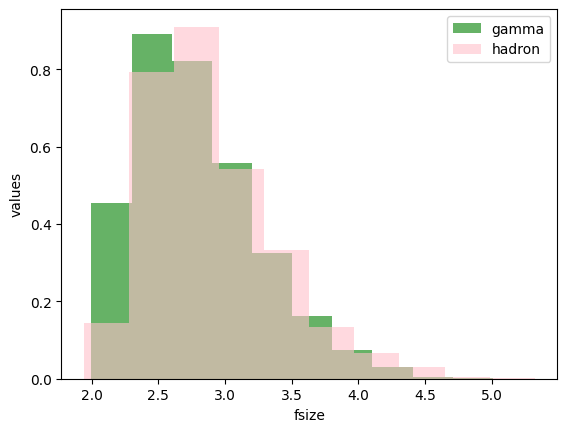

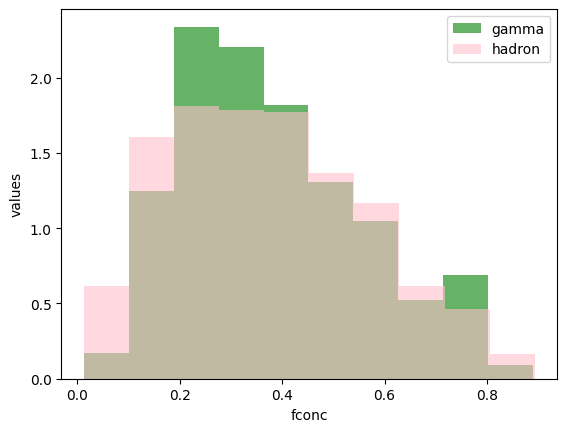

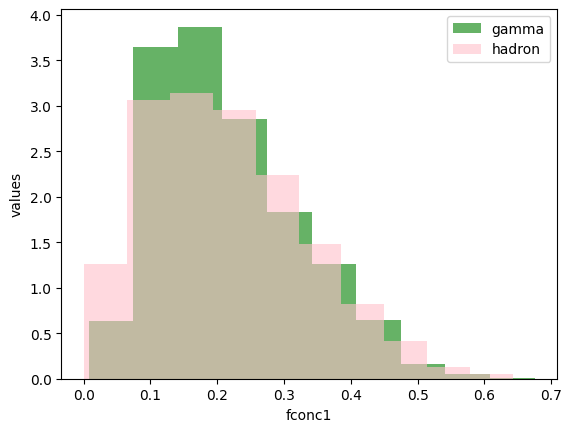

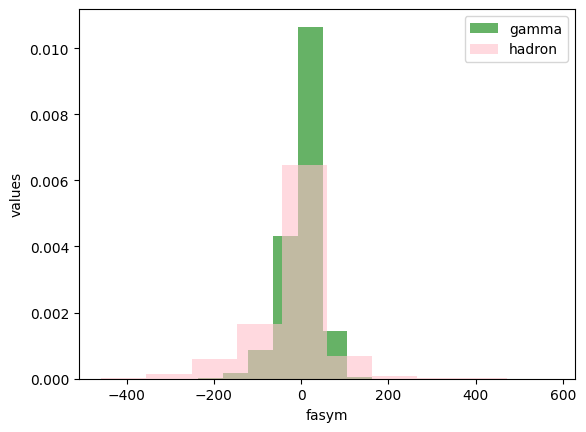

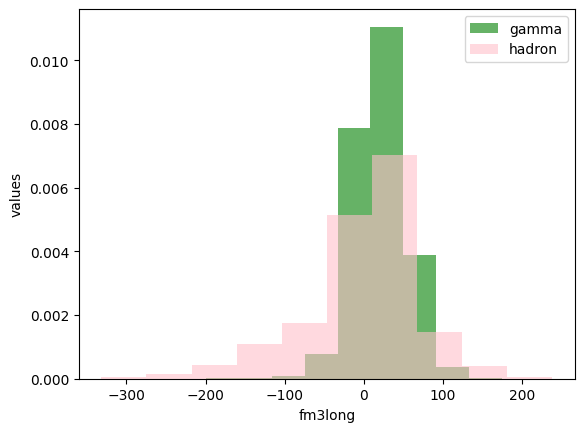

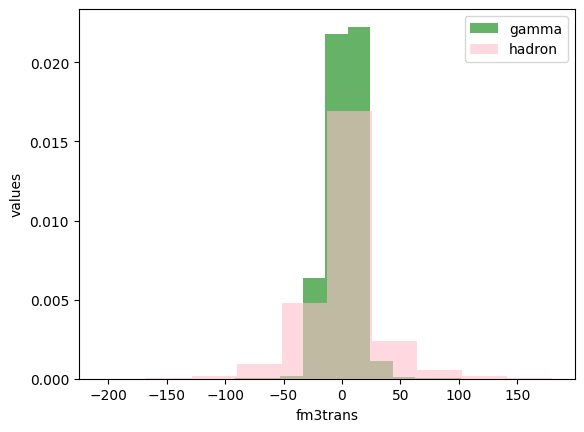

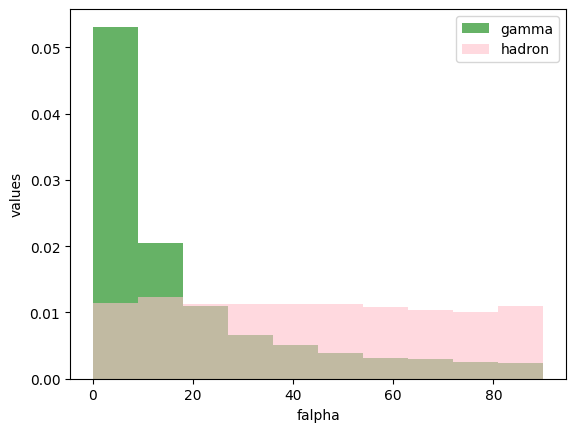

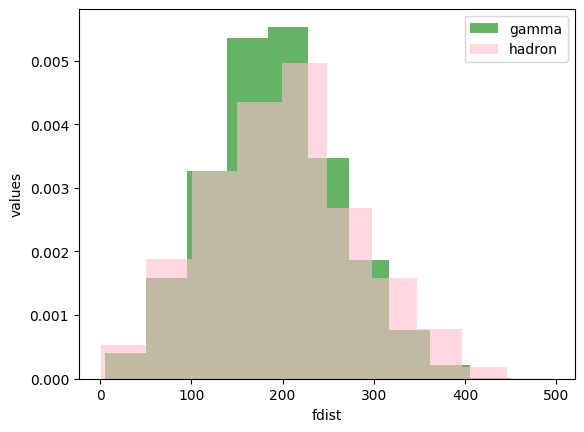

In [17]:
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label],color='green',label='gamma',alpha=0.6,density=True)
  plt.hist(df[df["class"]==0][label],color='pink',label='hadron',alpha=0.6,density=True)
  plt.ylabel("values")
  plt.xlabel(label)
  plt.legend()
  plt.show()

Train, Validate and Test datasets

In [4]:
train,validate,test = np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

In [5]:
def scaledata(dataframe,oversample=False):
  x = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scale = StandardScaler()
  x = scale.fit_transform(x)

  if oversample:
    ros = RandomOverSampler()
    x,y = ros.fit_resample(x,y)

  data = np.hstack((x,np.reshape(y,(-1,1))))

  return data,x,y


In [6]:
train,data_train,res_train = scaledata(train,oversample=True)
validate,data_validate,res_validate = scaledata(validate,oversample=False)
test,data_test,res_test = scaledata(test,oversample=False)

In [ ]:
len(train)


14798

In [ ]:
sum(res_train == 1)

7399

In [ ]:
sum(res_train == 0)

7399

KNN [Kth Nearest Neighbours]

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors = 5)
knn_model.fit(data_train,res_train)

KNeighborsClassifier()

In [ ]:
predictions = knn_model.predict(data_test)
print(classification_report(res_test,predictions))

              precision    recall  f1-score   support

           0       0.76      0.73      0.74      1378
           1       0.85      0.87      0.86      2426

    accuracy                           0.82      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804



Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model = GaussianNB()
nb_model = nb_model.fit(data_train,res_train)

In [ ]:
predictions = nb_model.predict(data_test)
print(classification_report(predictions,res_test))

              precision    recall  f1-score   support

           0       0.39      0.67      0.50       801
           1       0.89      0.73      0.80      3003

    accuracy                           0.71      3804
   macro avg       0.64      0.70      0.65      3804
weighted avg       0.79      0.71      0.74      3804



Logistic Regression


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(data_train,res_train)

In [ ]:
predictions = lg_model.predict(data_test)
print(classification_report(res_test,predictions))

              precision    recall  f1-score   support

           0       0.70      0.73      0.71      1363
           1       0.84      0.82      0.83      2441

    accuracy                           0.79      3804
   macro avg       0.77      0.78      0.77      3804
weighted avg       0.79      0.79      0.79      3804



Support Vector Machine

In [ ]:
from sklearn.svm import SVC #support vector classifier

In [ ]:
svm_model = SVC()
svm_model = svm_model.fit(data_train,res_train)

In [ ]:
predictions = svm_model.predict(data_test)
print(classification_report(predictions,res_test))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81      1313
           1       0.91      0.89      0.90      2491

    accuracy                           0.87      3804
   macro avg       0.85      0.86      0.85      3804
weighted avg       0.87      0.87      0.87      3804



Neural Network

In [8]:
import tensorflow as tf

In [9]:
def plot_main(history):
  fig,(axis1,axis2) = plt.subplots(1,2,figsize=[10,4])
  axis1.plot(history.history['loss'],label='loss')
  axis1.plot(history.history['val_loss'],label='val_loss')
  axis1.set_xlabel('Epoch')
  axis1.set_ylabel('Binary crossentropy')
  axis1.legend()
  axis1.grid(True)

  axis2.plot(history.history['accuracy'],label='accuracy')
  axis2.plot(history.history['val_accuracy'],label='val_accuracy')
  axis2.set_xlabel('Epoch')
  axis2.set_ylabel('Accuracy')
  axis2.legend()
  axis2.grid(True)

  plt.show()

In [10]:
def training_my_model(data_train,res_train,no_nodes,drop_prob,epochs,learning_rate,batch_size):
  nn_model = tf.keras.Sequential([
          tf.keras.layers.Dense(no_nodes,activation='relu'),
          tf.keras.layers.Dropout(drop_prob),
          tf.keras.layers.Dense(no_nodes,activation='relu'),
          tf.keras.layers.Dropout(drop_prob),
          tf.keras.layers.Dense(1,activation='sigmoid')
      ])
  nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),loss='binary_crossentropy',
                   metrics=['accuracy'])
  history = nn_model.fit(data_train,res_train,epochs=epochs,batch_size = batch_size,validation_split=0.2,verbose =0)

  return nn_model,history

In [12]:
temp_model,hist = training_my_model(data_train,res_train,16,0.2,100,0.001,32)

nodes: 16, drop_prob: 0, learning_rate: 0.1, batch_size: 32


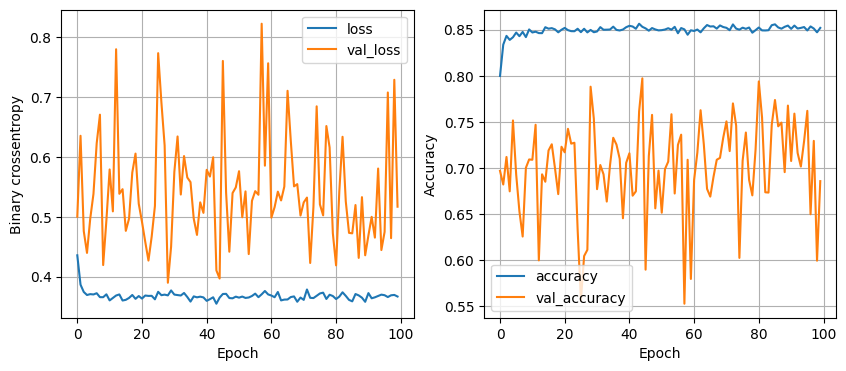

119/119 [==============================] - 0s 1ms/step - loss: 0.3636 - accuracy: 0.8607
my model loss: [0.3635735511779785, 0.8606729507446289]
nodes: 16, drop_prob: 0, learning_rate: 0.1, batch_size: 64


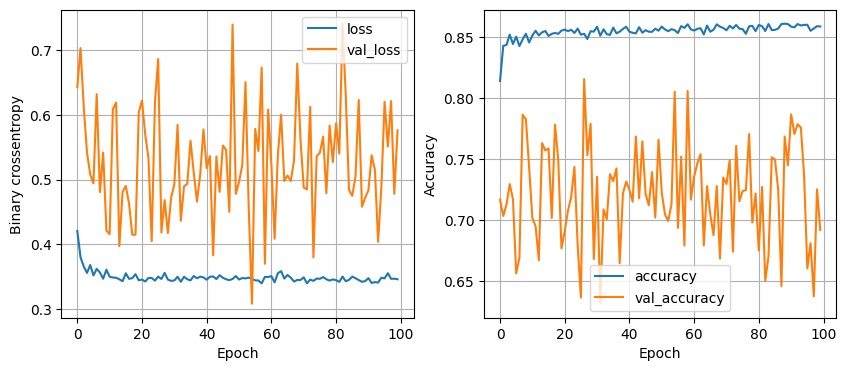

119/119 [==============================] - 0s 2ms/step - loss: 0.3319 - accuracy: 0.8651
my model loss: [0.33185094594955444, 0.8651419281959534]
nodes: 16, drop_prob: 0, learning_rate: 0.1, batch_size: 128


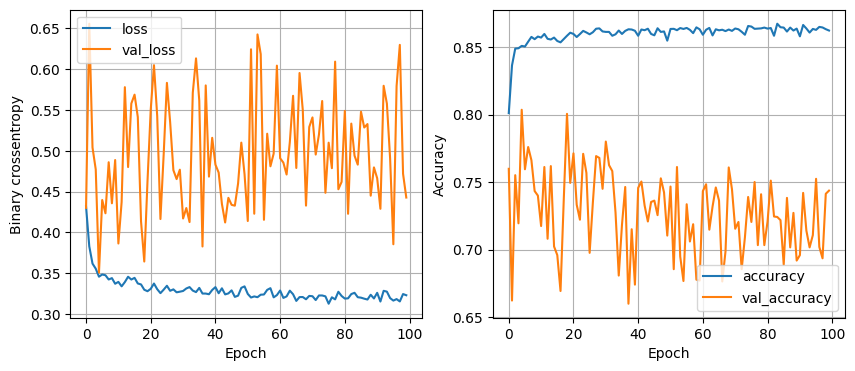

119/119 [==============================] - 0s 2ms/step - loss: 0.3244 - accuracy: 0.8683
my model loss: [0.32440170645713806, 0.8682965040206909]
nodes: 16, drop_prob: 0, learning_rate: 0.005, batch_size: 32


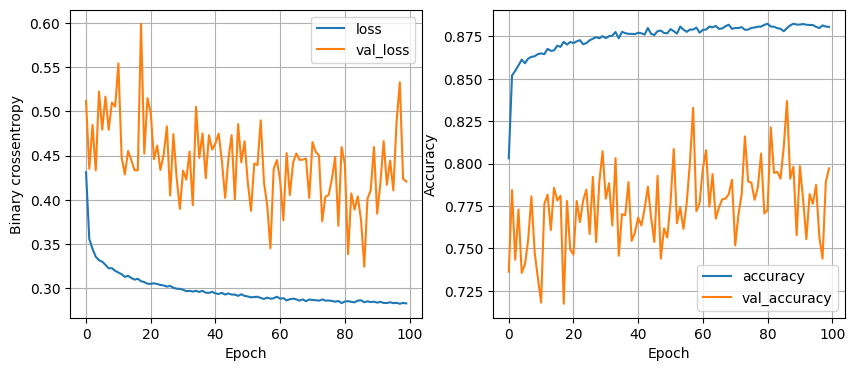

119/119 [==============================] - 0s 1ms/step - loss: 0.3132 - accuracy: 0.8725
my model loss: [0.3131755292415619, 0.8725026249885559]
nodes: 16, drop_prob: 0, learning_rate: 0.005, batch_size: 64


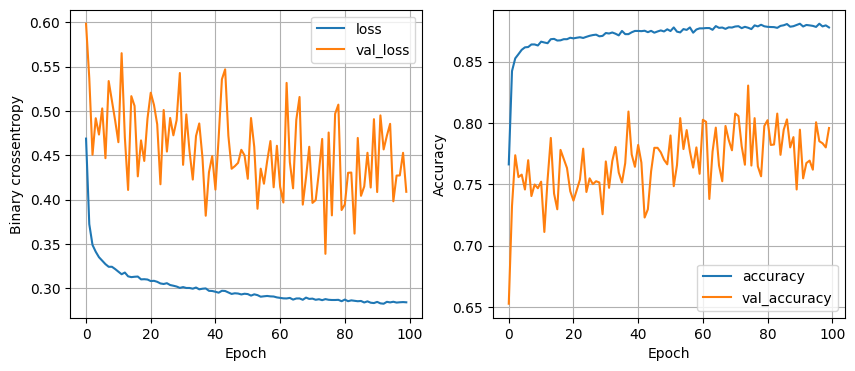

119/119 [==============================] - 0s 1ms/step - loss: 0.3147 - accuracy: 0.8696
my model loss: [0.31469258666038513, 0.8696109652519226]
nodes: 16, drop_prob: 0, learning_rate: 0.005, batch_size: 128


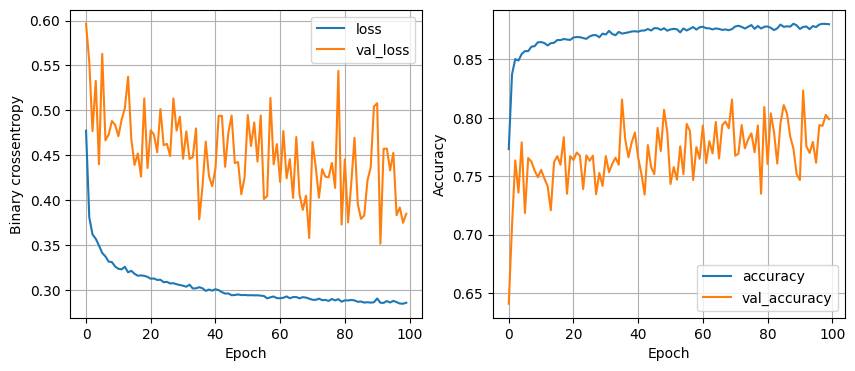

119/119 [==============================] - 0s 2ms/step - loss: 0.3155 - accuracy: 0.8665
my model loss: [0.31553003191947937, 0.8664563894271851]
nodes: 16, drop_prob: 0, learning_rate: 0.001, batch_size: 32


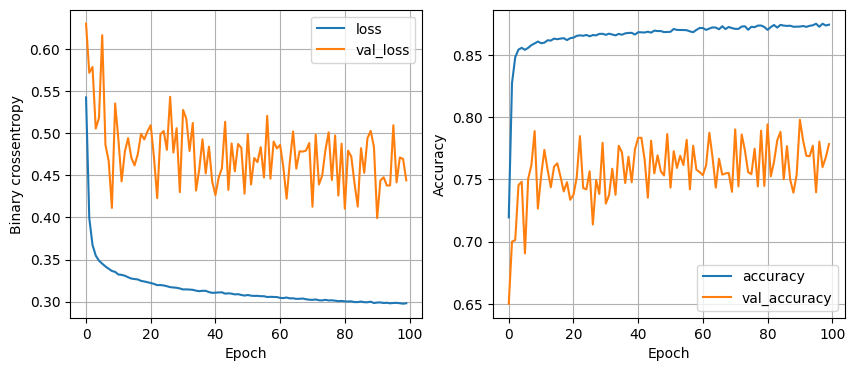

119/119 [==============================] - 0s 2ms/step - loss: 0.3112 - accuracy: 0.8651
my model loss: [0.311156302690506, 0.8651419281959534]
nodes: 16, drop_prob: 0, learning_rate: 0.001, batch_size: 64


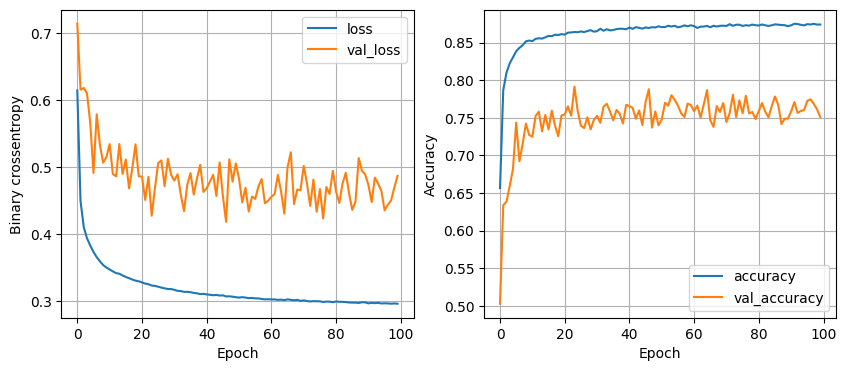

119/119 [==============================] - 0s 3ms/step - loss: 0.3063 - accuracy: 0.8693
my model loss: [0.30626180768013, 0.8693480491638184]
nodes: 16, drop_prob: 0, learning_rate: 0.001, batch_size: 128


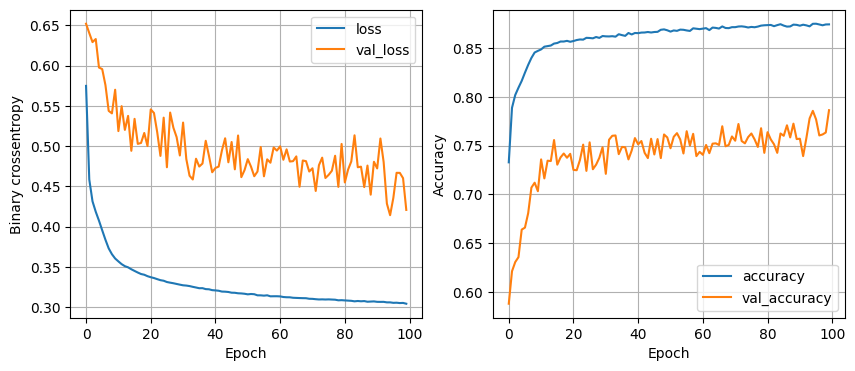

119/119 [==============================] - 0s 2ms/step - loss: 0.3197 - accuracy: 0.8628
my model loss: [0.3196866512298584, 0.8627760410308838]
nodes: 16, drop_prob: 0.2, learning_rate: 0.1, batch_size: 32


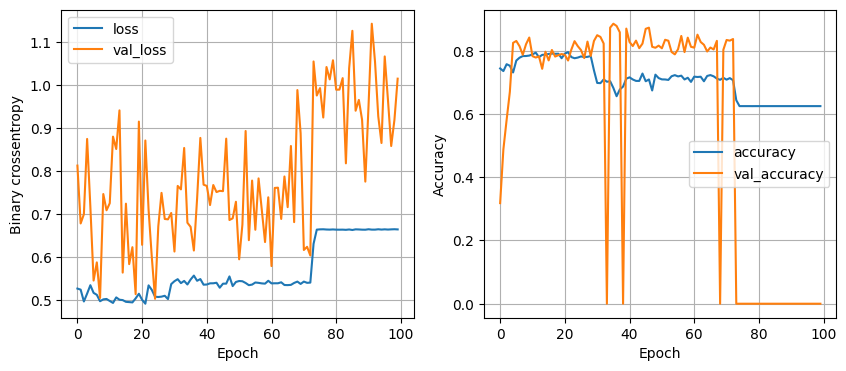

119/119 [==============================] - 0s 2ms/step - loss: 0.6474 - accuracy: 0.6506
my model loss: [0.6474348306655884, 0.6506308913230896]
nodes: 16, drop_prob: 0.2, learning_rate: 0.1, batch_size: 64


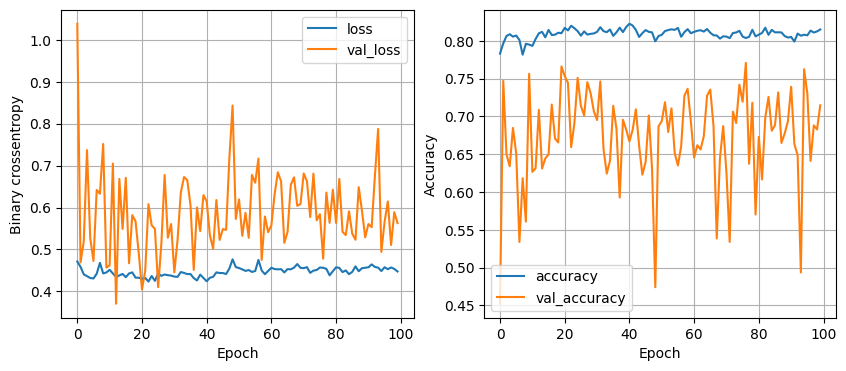

119/119 [==============================] - 0s 2ms/step - loss: 0.3780 - accuracy: 0.8549
my model loss: [0.3779732882976532, 0.8548895716667175]
nodes: 16, drop_prob: 0.2, learning_rate: 0.1, batch_size: 128


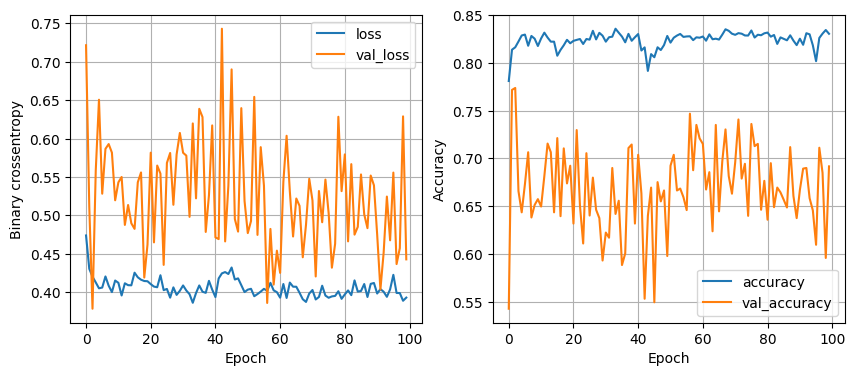

119/119 [==============================] - 0s 2ms/step - loss: 0.3660 - accuracy: 0.8601
my model loss: [0.36595702171325684, 0.86014723777771]
nodes: 16, drop_prob: 0.2, learning_rate: 0.005, batch_size: 32


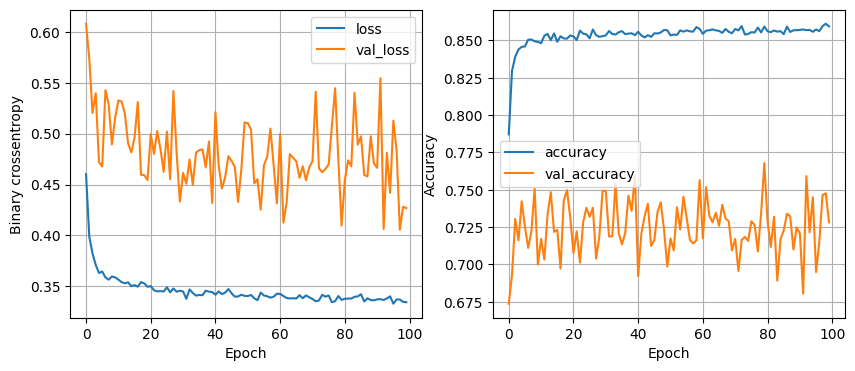

119/119 [==============================] - 0s 2ms/step - loss: 0.3216 - accuracy: 0.8688
my model loss: [0.3216160535812378, 0.8688222765922546]
nodes: 16, drop_prob: 0.2, learning_rate: 0.005, batch_size: 64


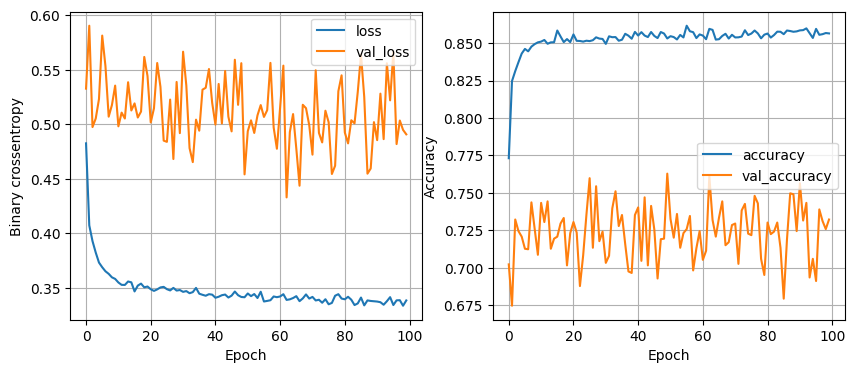

119/119 [==============================] - 0s 3ms/step - loss: 0.3131 - accuracy: 0.8701
my model loss: [0.31309953331947327, 0.8701366782188416]
nodes: 16, drop_prob: 0.2, learning_rate: 0.005, batch_size: 128


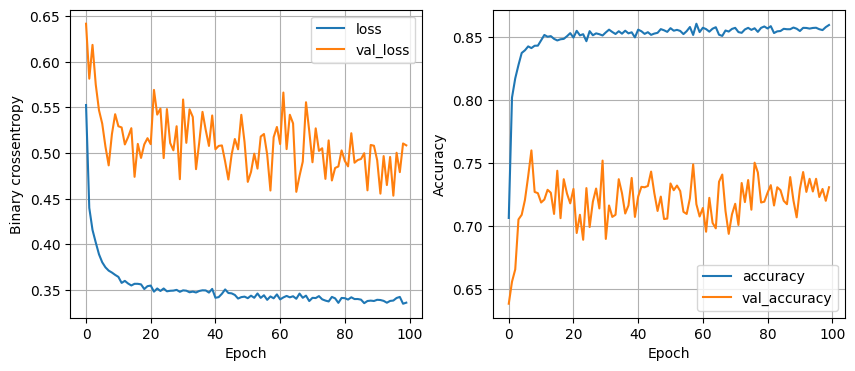

119/119 [==============================] - 0s 2ms/step - loss: 0.3170 - accuracy: 0.8754
my model loss: [0.3170241117477417, 0.875394344329834]
nodes: 16, drop_prob: 0.2, learning_rate: 0.001, batch_size: 32


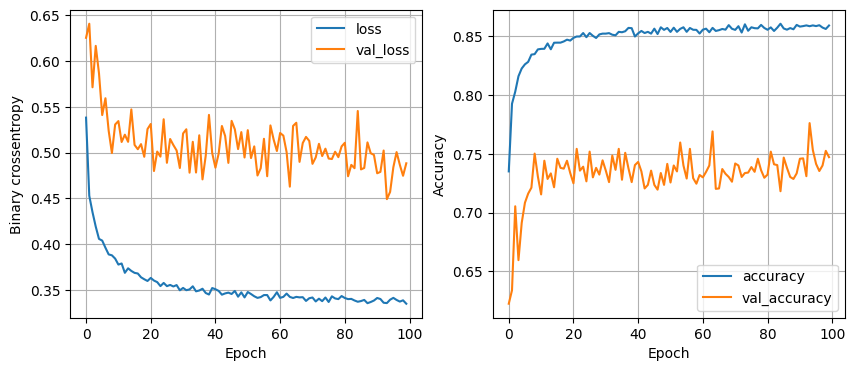

119/119 [==============================] - 0s 2ms/step - loss: 0.3145 - accuracy: 0.8670
my model loss: [0.31453564763069153, 0.866982102394104]
nodes: 16, drop_prob: 0.2, learning_rate: 0.001, batch_size: 64


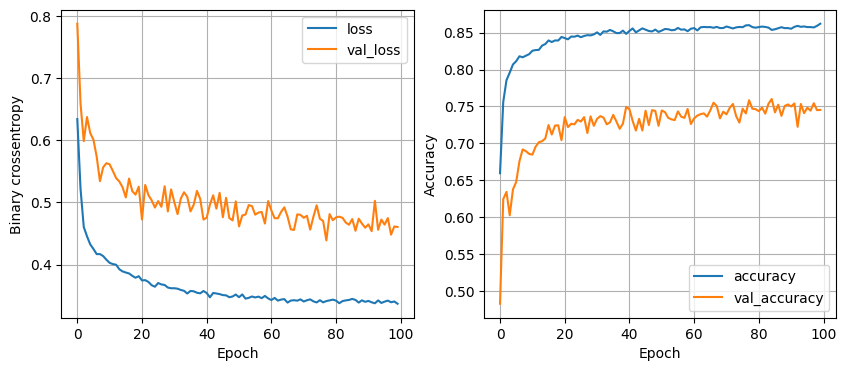

119/119 [==============================] - 0s 2ms/step - loss: 0.3161 - accuracy: 0.8680
my model loss: [0.31612229347229004, 0.8680336475372314]
nodes: 16, drop_prob: 0.2, learning_rate: 0.001, batch_size: 128


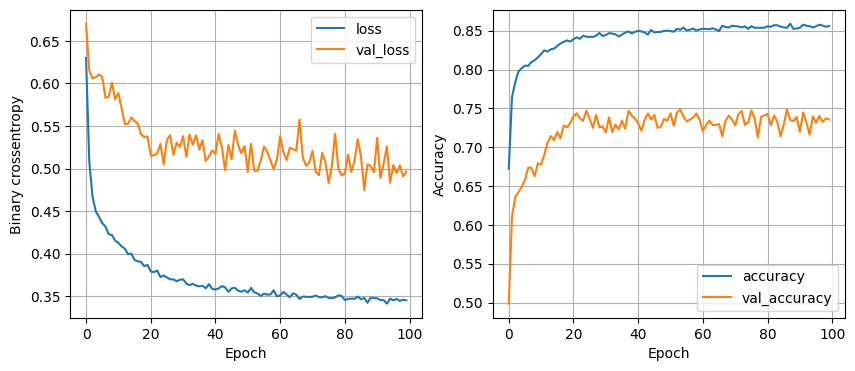

119/119 [==============================] - 0s 2ms/step - loss: 0.3234 - accuracy: 0.8633
my model loss: [0.32342061400413513, 0.8633018136024475]
nodes: 32, drop_prob: 0, learning_rate: 0.1, batch_size: 32


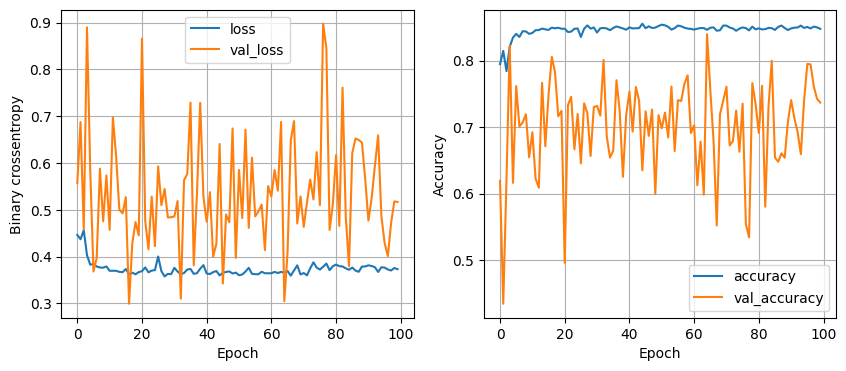

119/119 [==============================] - 0s 2ms/step - loss: 0.3604 - accuracy: 0.8623
my model loss: [0.3603552281856537, 0.8622502684593201]
nodes: 32, drop_prob: 0, learning_rate: 0.1, batch_size: 64


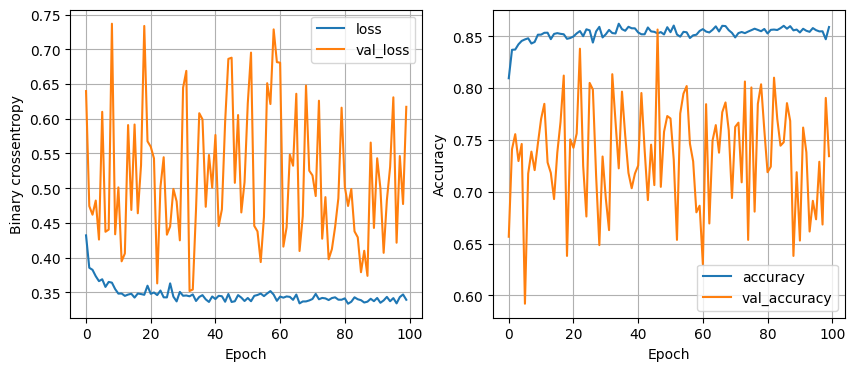

119/119 [==============================] - 0s 2ms/step - loss: 0.3393 - accuracy: 0.8615
my model loss: [0.33926042914390564, 0.8614616394042969]
nodes: 32, drop_prob: 0, learning_rate: 0.1, batch_size: 128


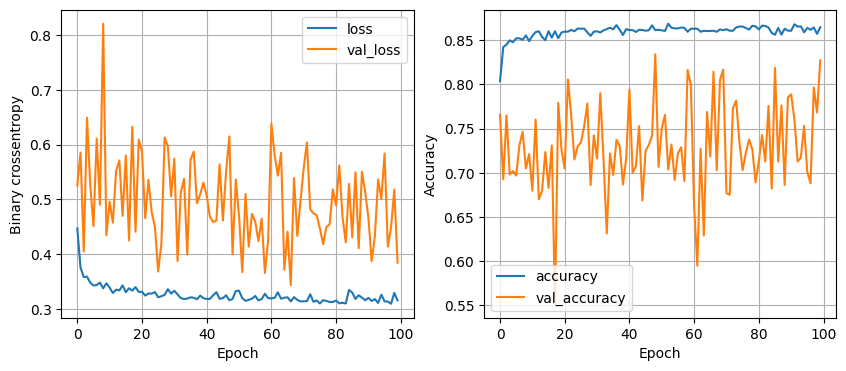

119/119 [==============================] - 0s 3ms/step - loss: 0.3282 - accuracy: 0.8486
my model loss: [0.3282111585140228, 0.8485804200172424]
nodes: 32, drop_prob: 0, learning_rate: 0.005, batch_size: 32


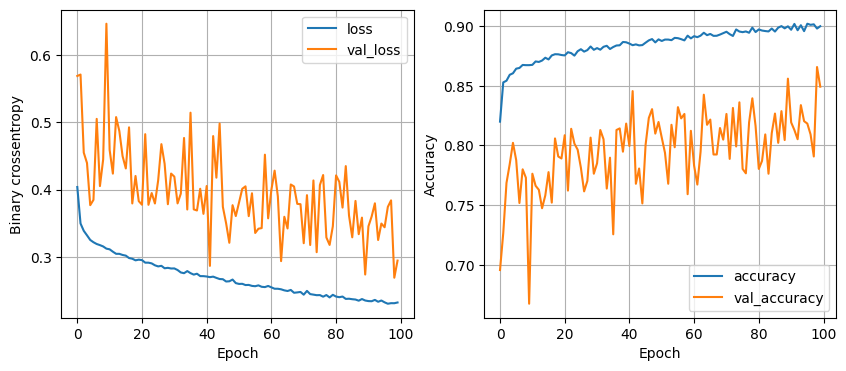

119/119 [==============================] - 0s 3ms/step - loss: 0.3618 - accuracy: 0.8667
my model loss: [0.36182326078414917, 0.8667192459106445]
nodes: 32, drop_prob: 0, learning_rate: 0.005, batch_size: 64


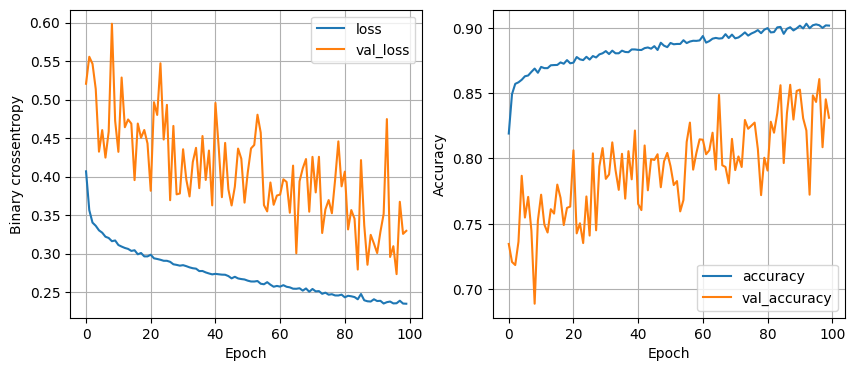

119/119 [==============================] - 0s 3ms/step - loss: 0.3391 - accuracy: 0.8701
my model loss: [0.3391481339931488, 0.8701366782188416]
nodes: 32, drop_prob: 0, learning_rate: 0.005, batch_size: 128


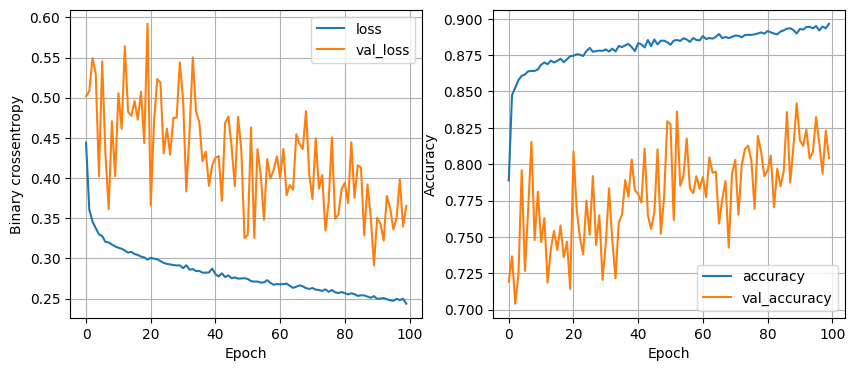

119/119 [==============================] - 0s 3ms/step - loss: 0.3295 - accuracy: 0.8741
my model loss: [0.3295232951641083, 0.8740799427032471]
nodes: 32, drop_prob: 0, learning_rate: 0.001, batch_size: 32


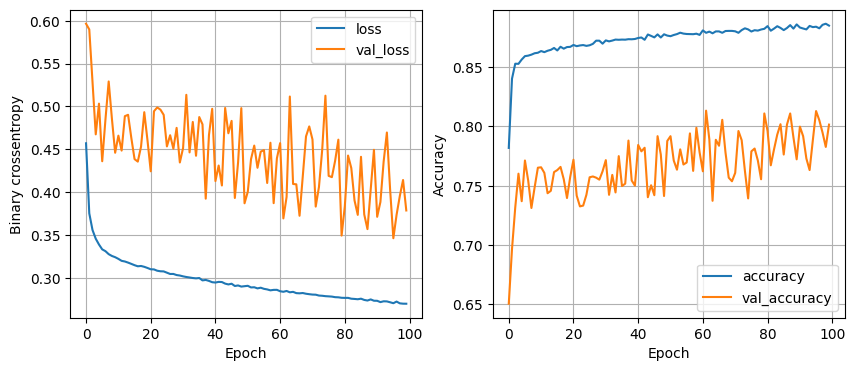

119/119 [==============================] - 0s 2ms/step - loss: 0.3146 - accuracy: 0.8699
my model loss: [0.314614862203598, 0.8698738217353821]
nodes: 32, drop_prob: 0, learning_rate: 0.001, batch_size: 64


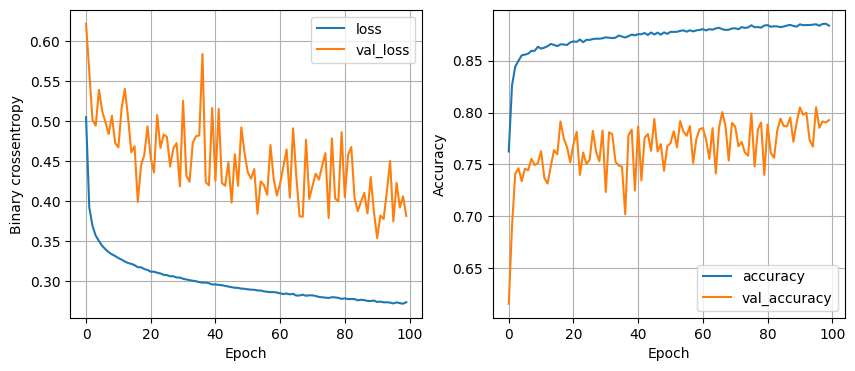

119/119 [==============================] - 0s 3ms/step - loss: 0.3149 - accuracy: 0.8704
my model loss: [0.3148941993713379, 0.8703995943069458]
nodes: 32, drop_prob: 0, learning_rate: 0.001, batch_size: 128


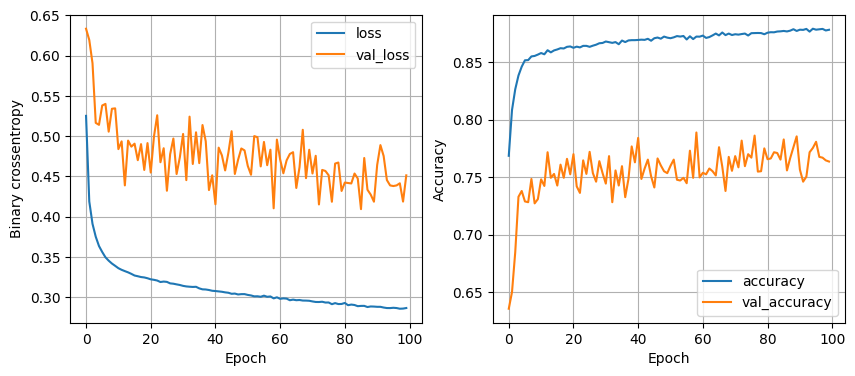

119/119 [==============================] - 0s 2ms/step - loss: 0.3086 - accuracy: 0.8707
my model loss: [0.3085888624191284, 0.8706624507904053]
nodes: 32, drop_prob: 0.2, learning_rate: 0.1, batch_size: 32


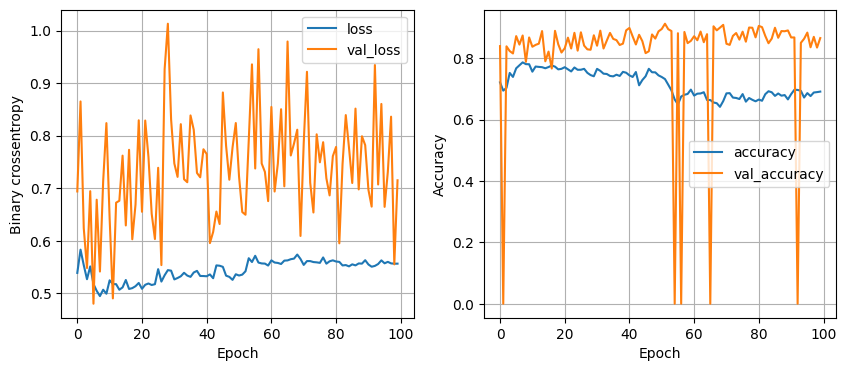

119/119 [==============================] - 0s 2ms/step - loss: 0.5113 - accuracy: 0.7508
my model loss: [0.5113218426704407, 0.7507886290550232]
nodes: 32, drop_prob: 0.2, learning_rate: 0.1, batch_size: 64


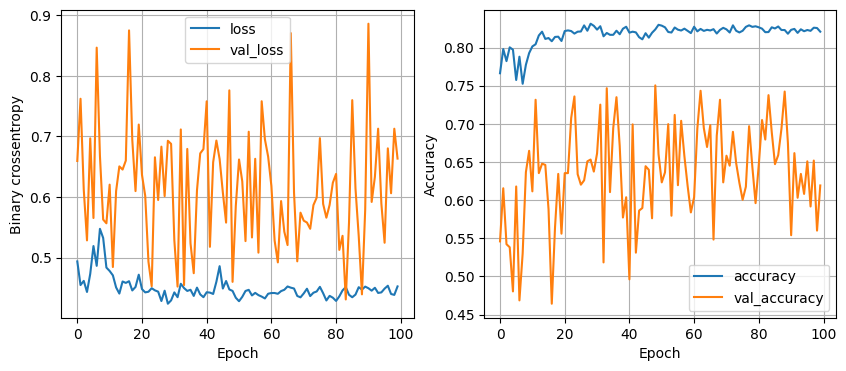

119/119 [==============================] - 0s 2ms/step - loss: 0.3916 - accuracy: 0.8481
my model loss: [0.39161884784698486, 0.8480547070503235]
nodes: 32, drop_prob: 0.2, learning_rate: 0.1, batch_size: 128


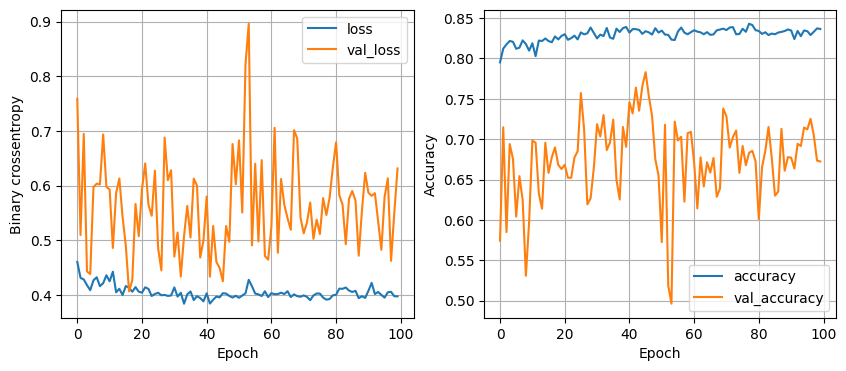

119/119 [==============================] - 0s 2ms/step - loss: 0.3561 - accuracy: 0.8573
my model loss: [0.35611456632614136, 0.8572555184364319]
nodes: 32, drop_prob: 0.2, learning_rate: 0.005, batch_size: 32


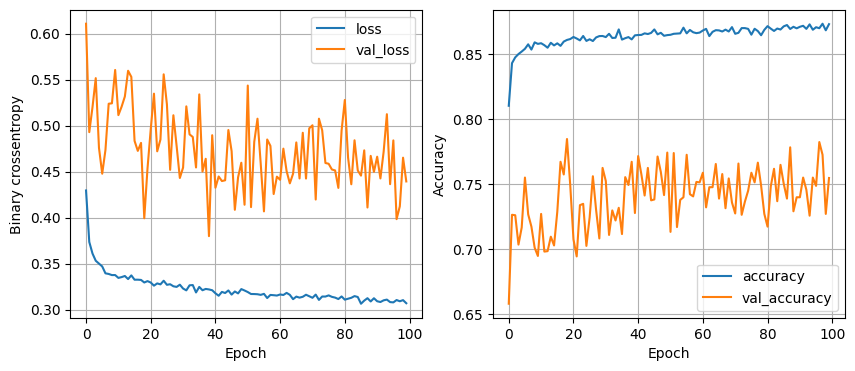

119/119 [==============================] - 0s 2ms/step - loss: 0.3036 - accuracy: 0.8751
my model loss: [0.3035774528980255, 0.8751314282417297]
nodes: 32, drop_prob: 0.2, learning_rate: 0.005, batch_size: 64


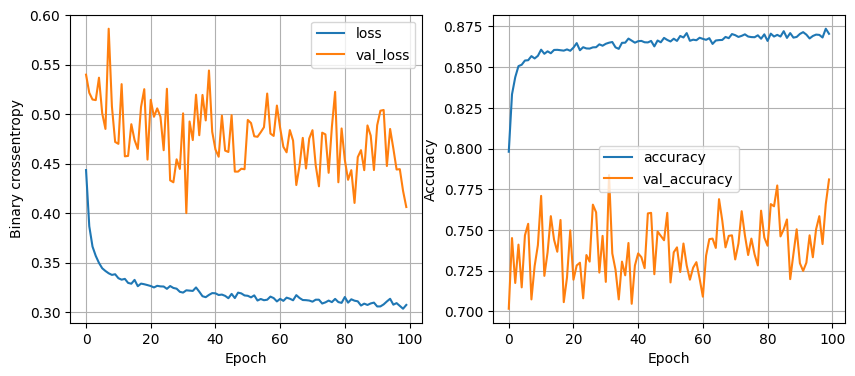

119/119 [==============================] - 0s 2ms/step - loss: 0.3000 - accuracy: 0.8785
my model loss: [0.30004724860191345, 0.8785489201545715]
nodes: 32, drop_prob: 0.2, learning_rate: 0.005, batch_size: 128


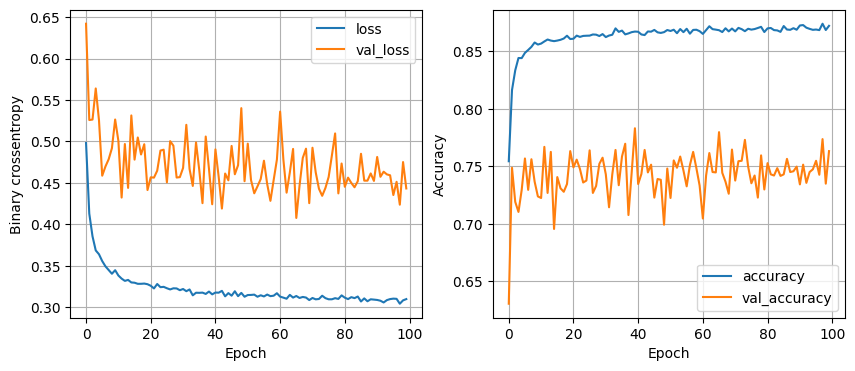

119/119 [==============================] - 0s 2ms/step - loss: 0.3045 - accuracy: 0.8730
my model loss: [0.30451950430870056, 0.8730283975601196]
nodes: 32, drop_prob: 0.2, learning_rate: 0.001, batch_size: 32


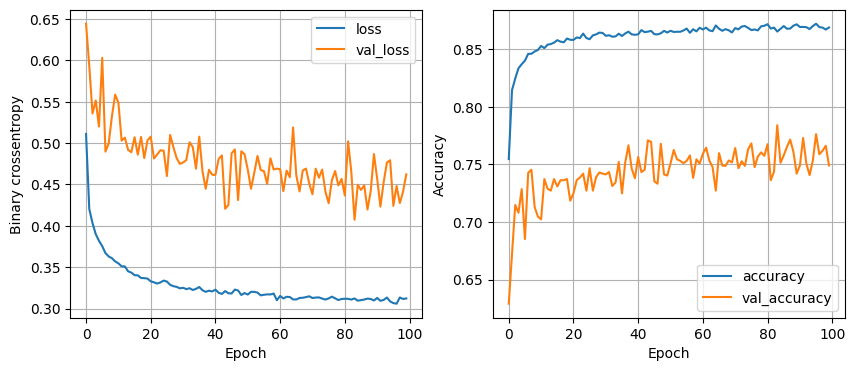

119/119 [==============================] - 0s 2ms/step - loss: 0.3036 - accuracy: 0.8757
my model loss: [0.3036457598209381, 0.8756572008132935]
nodes: 32, drop_prob: 0.2, learning_rate: 0.001, batch_size: 64


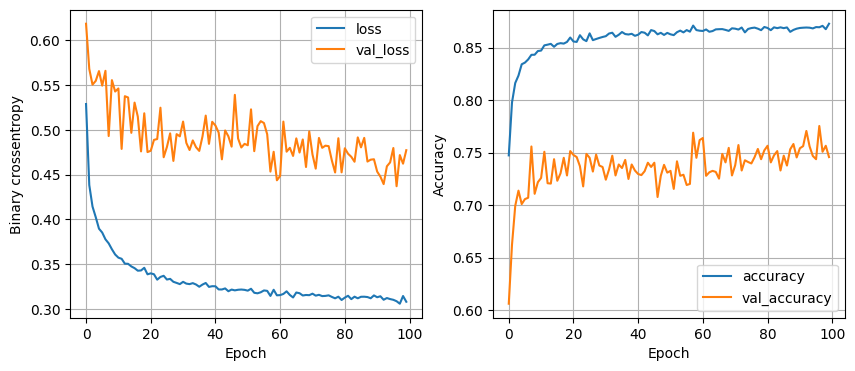

119/119 [==============================] - 0s 3ms/step - loss: 0.3074 - accuracy: 0.8728
my model loss: [0.307359904050827, 0.8727654814720154]
nodes: 32, drop_prob: 0.2, learning_rate: 0.001, batch_size: 128


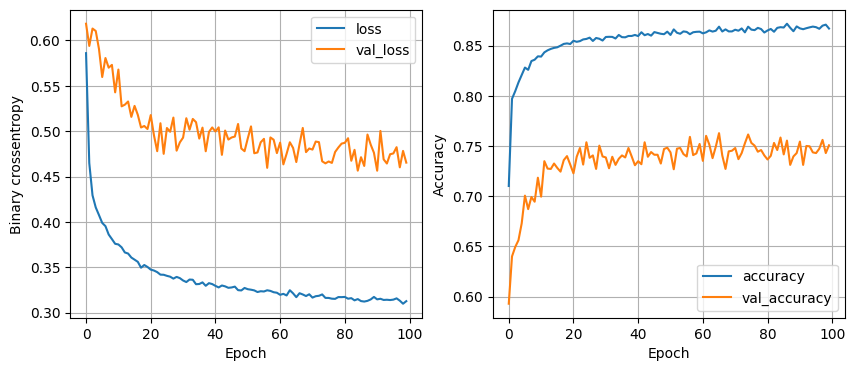

119/119 [==============================] - 0s 2ms/step - loss: 0.3057 - accuracy: 0.8696
my model loss: [0.30571335554122925, 0.8696109652519226]
nodes: 64, drop_prob: 0, learning_rate: 0.1, batch_size: 32


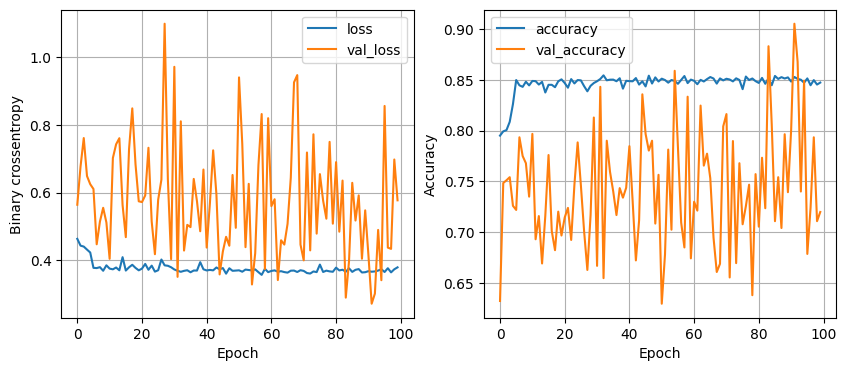

119/119 [==============================] - 0s 2ms/step - loss: 0.3476 - accuracy: 0.8544
my model loss: [0.3476027250289917, 0.8543637990951538]
nodes: 64, drop_prob: 0, learning_rate: 0.1, batch_size: 64


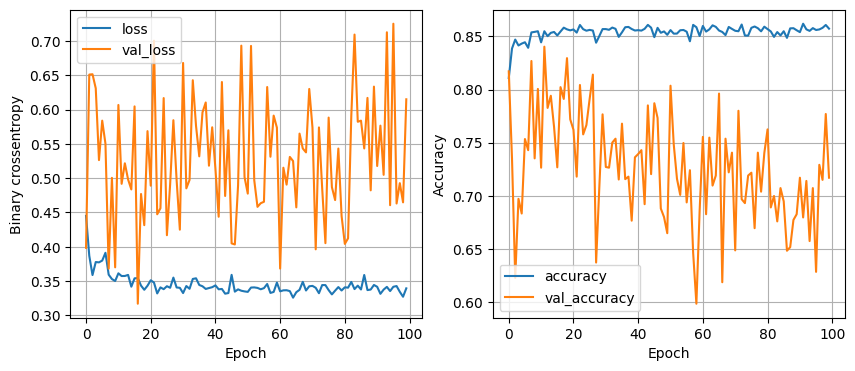

119/119 [==============================] - 0s 2ms/step - loss: 0.3738 - accuracy: 0.8651
my model loss: [0.37384673953056335, 0.8651419281959534]
nodes: 64, drop_prob: 0, learning_rate: 0.1, batch_size: 128


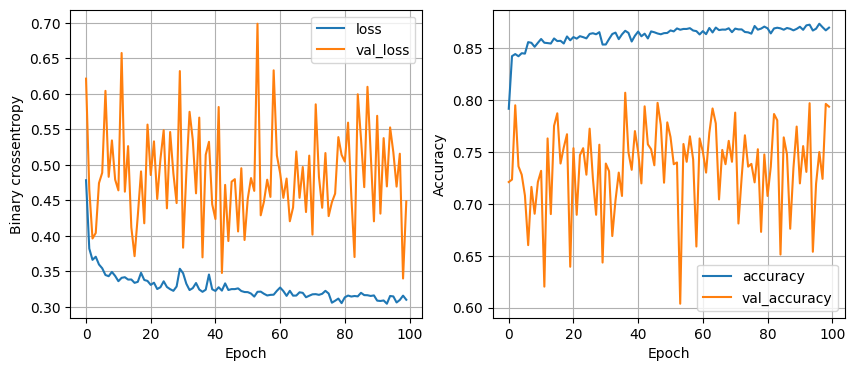

119/119 [==============================] - 0s 2ms/step - loss: 0.3318 - accuracy: 0.8617
my model loss: [0.3318476378917694, 0.8617244958877563]
nodes: 64, drop_prob: 0, learning_rate: 0.005, batch_size: 32


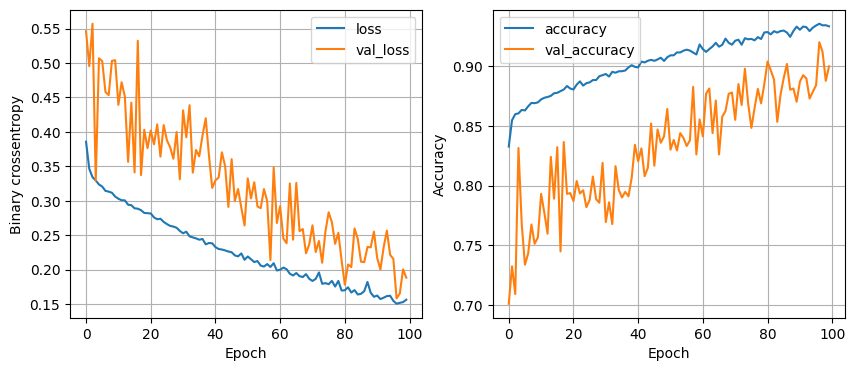

119/119 [==============================] - 0s 2ms/step - loss: 0.5603 - accuracy: 0.8533
my model loss: [0.5603181719779968, 0.8533123135566711]
nodes: 64, drop_prob: 0, learning_rate: 0.005, batch_size: 64


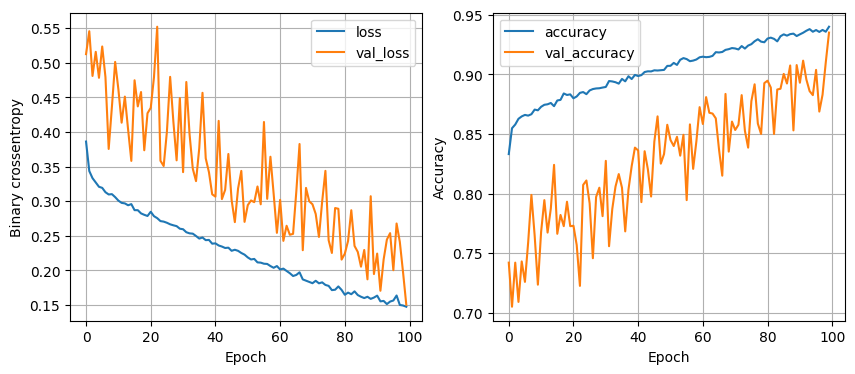

119/119 [==============================] - 0s 2ms/step - loss: 0.5300 - accuracy: 0.8394
my model loss: [0.529990017414093, 0.839379608631134]
nodes: 64, drop_prob: 0, learning_rate: 0.005, batch_size: 128


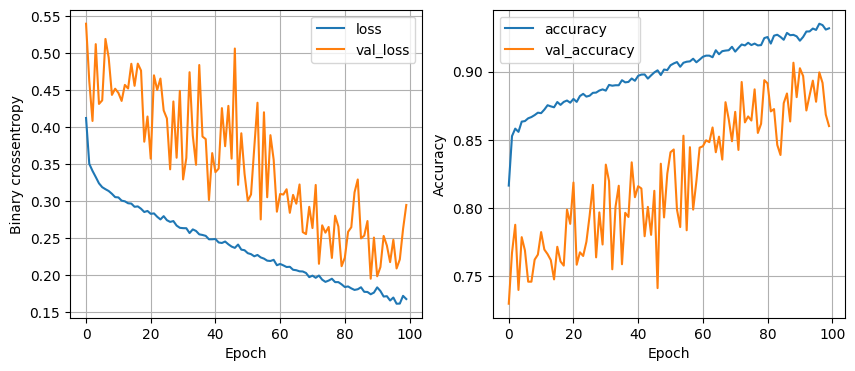

119/119 [==============================] - 0s 2ms/step - loss: 0.4359 - accuracy: 0.8651
my model loss: [0.4359154999256134, 0.8651419281959534]
nodes: 64, drop_prob: 0, learning_rate: 0.001, batch_size: 32


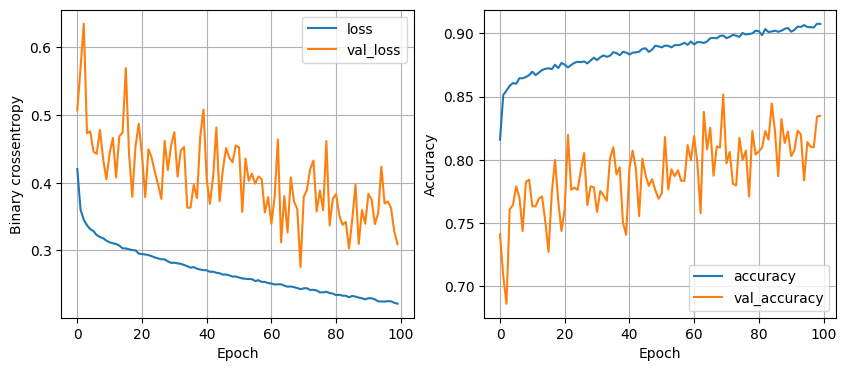

119/119 [==============================] - 0s 2ms/step - loss: 0.3372 - accuracy: 0.8707
my model loss: [0.3371841609477997, 0.8706624507904053]
nodes: 64, drop_prob: 0, learning_rate: 0.001, batch_size: 64


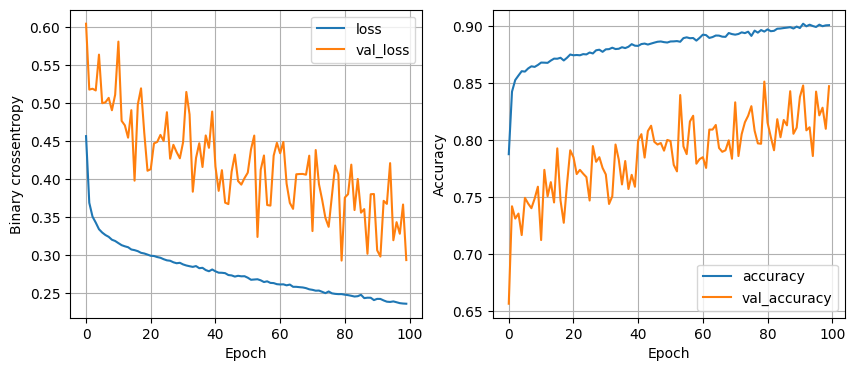

119/119 [==============================] - 0s 2ms/step - loss: 0.3151 - accuracy: 0.8662
my model loss: [0.3151279091835022, 0.8661934733390808]
nodes: 64, drop_prob: 0, learning_rate: 0.001, batch_size: 128


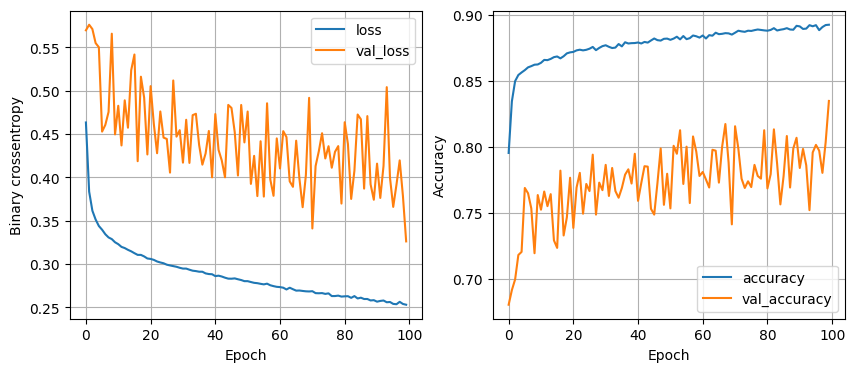

119/119 [==============================] - 0s 2ms/step - loss: 0.3147 - accuracy: 0.8709
my model loss: [0.3147002160549164, 0.8709253668785095]
nodes: 64, drop_prob: 0.2, learning_rate: 0.1, batch_size: 32


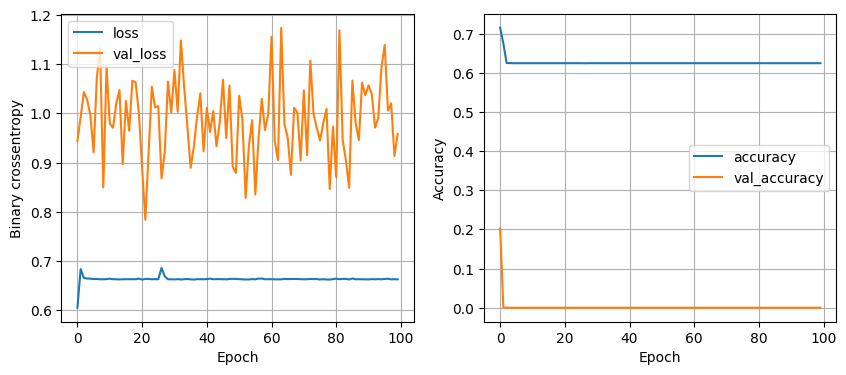

119/119 [==============================] - 0s 3ms/step - loss: 0.6495 - accuracy: 0.6506
my model loss: [0.649545431137085, 0.6506308913230896]
nodes: 64, drop_prob: 0.2, learning_rate: 0.1, batch_size: 64


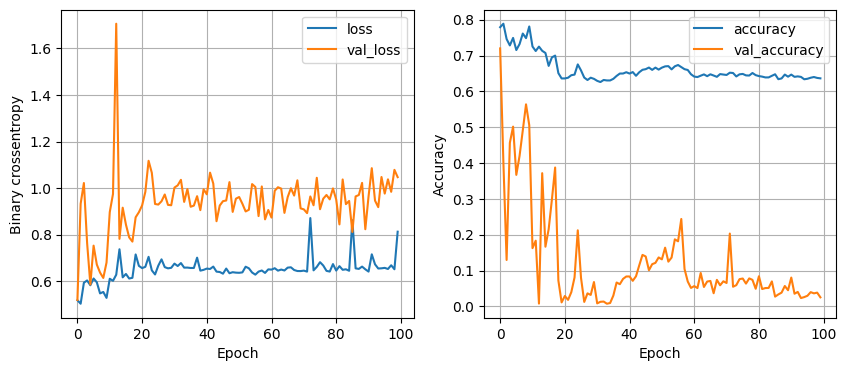

119/119 [==============================] - 0s 3ms/step - loss: 0.6354 - accuracy: 0.6617
my model loss: [0.6353586316108704, 0.6616719365119934]
nodes: 64, drop_prob: 0.2, learning_rate: 0.1, batch_size: 128


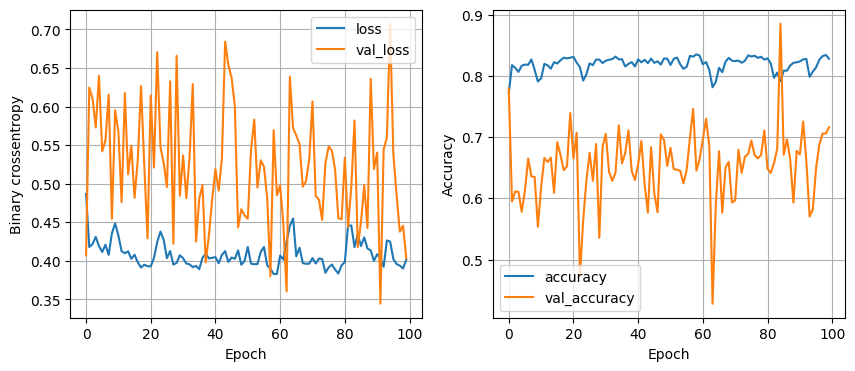

119/119 [==============================] - 0s 3ms/step - loss: 0.3564 - accuracy: 0.8596
my model loss: [0.3563638925552368, 0.8596214652061462]
nodes: 64, drop_prob: 0.2, learning_rate: 0.005, batch_size: 32


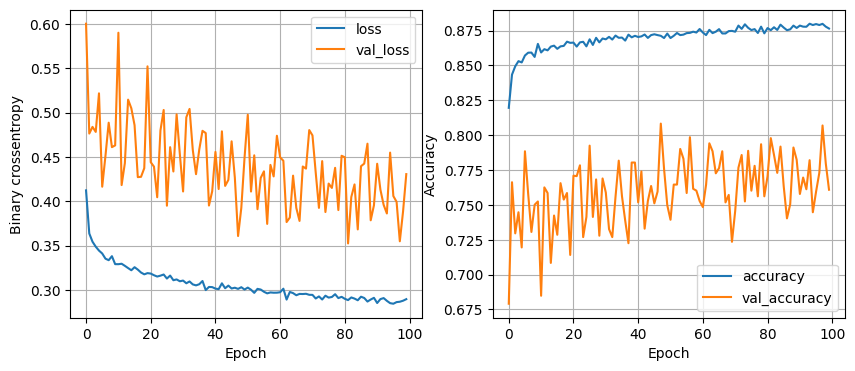

119/119 [==============================] - 0s 2ms/step - loss: 0.3048 - accuracy: 0.8730
my model loss: [0.30481451749801636, 0.8730283975601196]
nodes: 64, drop_prob: 0.2, learning_rate: 0.005, batch_size: 64


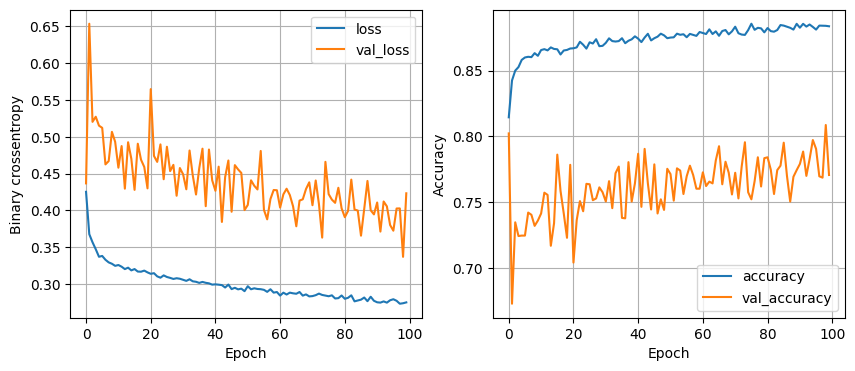

119/119 [==============================] - 0s 3ms/step - loss: 0.2959 - accuracy: 0.8859
my model loss: [0.2958598732948303, 0.8859095573425293]
nodes: 64, drop_prob: 0.2, learning_rate: 0.005, batch_size: 128


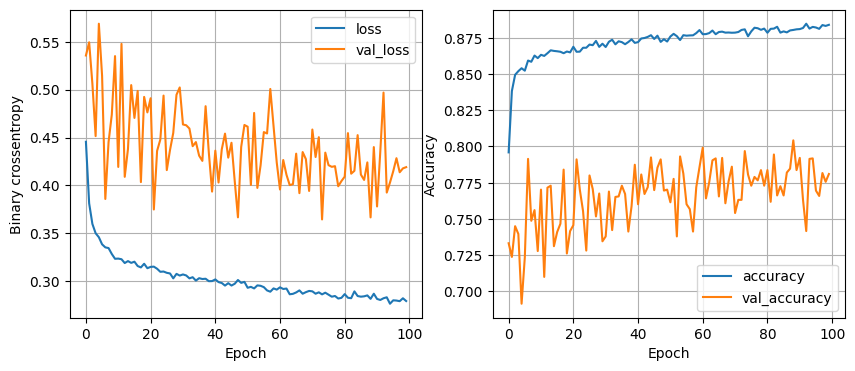

119/119 [==============================] - 0s 2ms/step - loss: 0.3065 - accuracy: 0.8770
my model loss: [0.3065408170223236, 0.8769716024398804]
nodes: 64, drop_prob: 0.2, learning_rate: 0.001, batch_size: 32


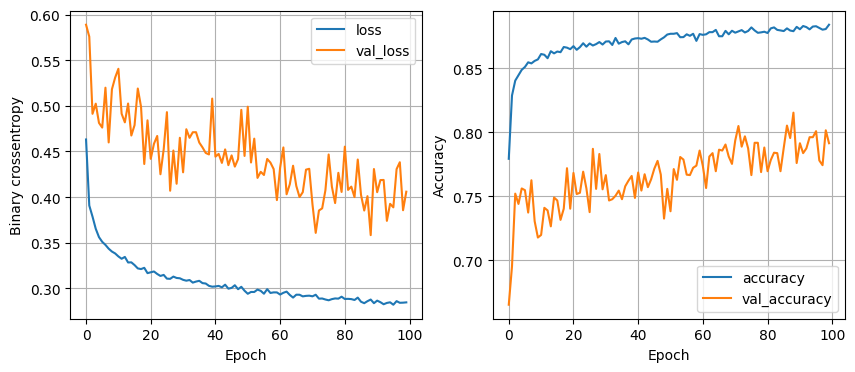

119/119 [==============================] - 0s 2ms/step - loss: 0.2984 - accuracy: 0.8785
my model loss: [0.29837939143180847, 0.8785489201545715]
nodes: 64, drop_prob: 0.2, learning_rate: 0.001, batch_size: 64


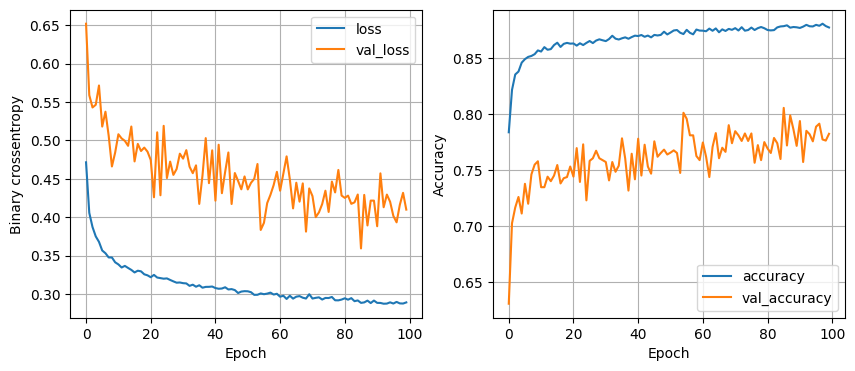

119/119 [==============================] - 0s 2ms/step - loss: 0.2899 - accuracy: 0.8796
my model loss: [0.2898640036582947, 0.8796004056930542]
nodes: 64, drop_prob: 0.2, learning_rate: 0.001, batch_size: 128


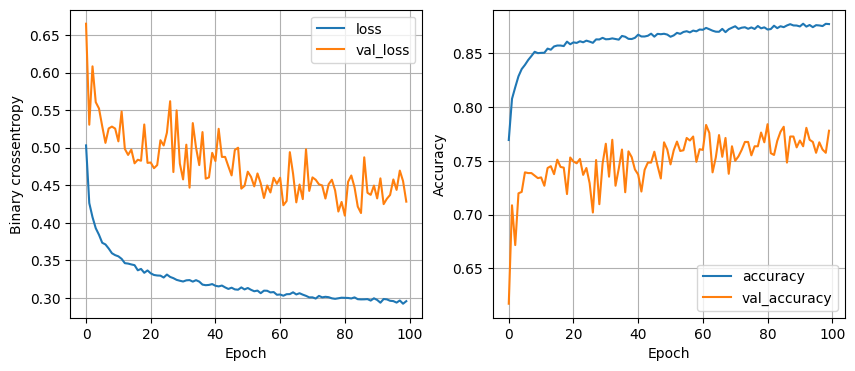

119/119 [==============================] - 0s 2ms/step - loss: 0.2984 - accuracy: 0.8759
my model loss: [0.2983914911746979, 0.8759200572967529]


In [ ]:
min_validation_loss = float('inf')
min_validation_model = None

epochs = 100
for no_nodes in [16,32,64]:
  for drop_prob in [0,0.2]:
    for learning_rate in [0.1,0.005,0.001]:
      for batch_size in [32,64,128]:
        print(f"nodes: {no_nodes}, drop_prob: {drop_prob}, learning_rate: {learning_rate}, batch_size: {batch_size}")
        my_model,history = training_my_model(data_train,res_train,no_nodes,drop_prob,epochs,learning_rate,batch_size)
        plot_main(history)
        myval_loss = my_model.evaluate(data_validate,res_validate)
        print(f"my model loss: {myval_loss}")

In [14]:
temp_pred = temp_model.predict(data_test)

119/119 [==============================] - 0s 2ms/step


In [15]:
temp_pred = (temp_pred>0.5).astype(int).reshape(-1,)

In [16]:
print(classification_report(res_test,temp_pred))

              precision    recall  f1-score   support

           0       0.86      0.70      0.77      1293
           1       0.86      0.94      0.90      2511

    accuracy                           0.86      3804
   macro avg       0.86      0.82      0.84      3804
weighted avg       0.86      0.86      0.86      3804

